### Logistic Regression
In general regression try to predict a continuous value. Here the logistic regression allows us to solve the classification problems, where we try to predict discrete categories.

We can convert linear regression to a logistic regression curve using sigmoid function (aka "logistic")
![alt text](lr.png "LoR")

This always results in a probability from 0 to 1 of belonging in the 1 class. Anything below 0.5 goes to class 0 and anything above 0.5 goes to class 1. So, here 0.5 is the cut-off point. So, in the binary classification, if the probability is 50% or above the 50% then belongs to the class 1 and if the probabilty is 50% or below 50% then it belongs to the class 0.

#### Model Evaluation
![alt text](log_mod1.png "LoR") ![alt text](log_mod2.png "LoR")


In the above example, there are 165 sample size to test. Actual No = 60 and Actual Yes = 105.भन्नाले, १६५ जनालाई टेस्ट गर्दा, १०५ जन बिरामी भेटियो। यो पहिले नै लेबेल्ड छ।  तर मोडेलले ११० जना बिरामी प्रिडिक्ट गर्‍यो। False postive means they actualyy do not have disease but the results show they have disease(Type I error). False Negative means predicts that they do not have disease but in reality they did have disease(Type II error). 

### Accuracy
Accuaracy means, Overall, how often is it correct? or accuracy of our model.
Accuracy = (TP + TN)/Total = 150/165 = 0.91
Model wrong accuracy = 1 - 0.91 = 0.09 or (FP + FN)/total = 15/165 = 0.09

### Type I error ( False Positive) and Type II error (False Negative)
![alt text](FNFP.png "LoR")

### Logistic Regression Example
Titanic dataset : Try to predict whether or not a passenger survived based off of their features.

In [1]:
##Kaggle.com has many datsets
## Import libraries first

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data
Now, Let's start by reading in the titanic_train.csv file into a pandas dataframe.

In [3]:
train = pd.read_csv('titanic_train.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


 Pclass= Passenger class in the titanic boat,
 Name = name of the passenger,
 Sex = gender of the passenger,
 SibSp = No of siblings or spouses on board,
 Parch = No of Parents or Children,
 Ticke = Ticet number,
 Fare = Fare ('bhada'),
 Embarked = go on board on Ship, Craft
 

In [5]:
train.isnull() #The ISNULL() function returns a specified value if the expression is NULL

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


### Missing Data
We can use seaborn to create a simple heatmap to see where we are missing data!


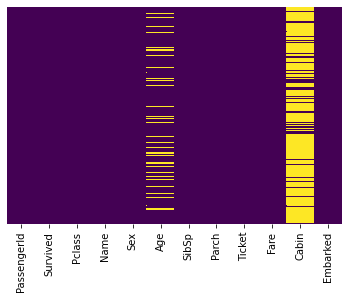

In [6]:
# Heat map
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')# cmap = color map

 It shows that roughly aboout 20% of age data is missing. Above plot is based on boolean i.e. true or false.
 Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0

In [7]:
sns.set_style('whitegrid') # see white grid on the background of the plot.


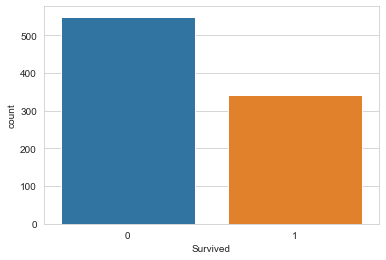

In [8]:
sns.countplot(x='Survived',data=train) # 0 for not survived and 1 for survived

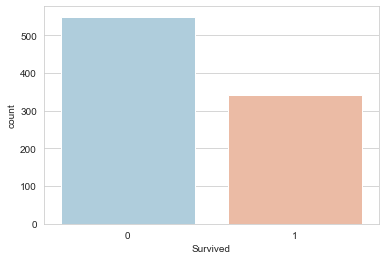

In [9]:
sns.countplot(x='Survived',data=train,palette='RdBu_r')# change the color of plot

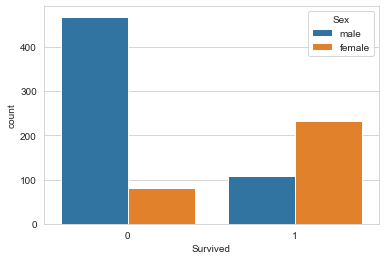

In [10]:
sns.countplot(x='Survived',hue='Sex',data=train)

Looks like people they did not survive are males. Among the survived people, female survved almost twice by the number than male.

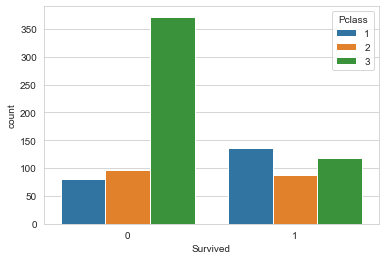

In [11]:
sns.countplot(x='Survived',hue='Pclass',data=train)# based on the passenger class.

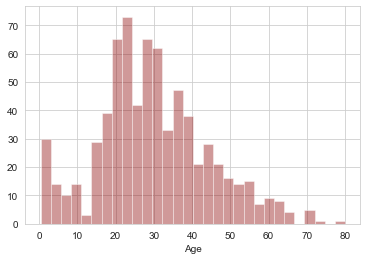

In [12]:
#To get an idea of age of the people in that Titanic, use distribution plot
#kde=false = just to look the histogram
# Average age between 20-30
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=30) #kde=kernel density estimate

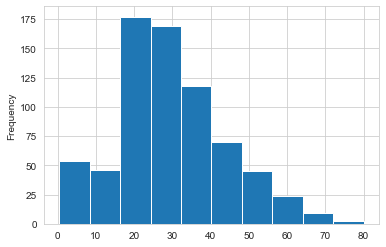

In [13]:
# Another way to make this plot
train['Age'].plot.hist()

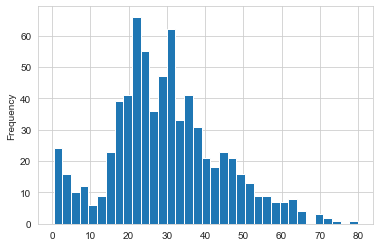

In [14]:
train['Age'].plot.hist(bins=35) # define the bin size

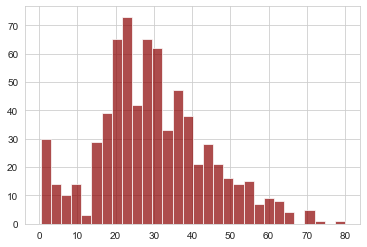

In [15]:
train['Age'].hist(bins=30,color='darkred',alpha=0.7)

In [16]:
train.info() # information about other columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


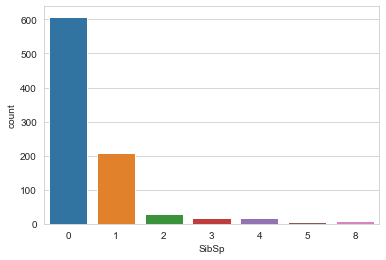

In [17]:
sns.countplot(x='SibSp',data=train) #

The above plot shows that most of the people neither have sibling or spouse on board ( in that titanic). her count 600 for SbSp = 0 indicates that. That means 600 people have no Spouse/Sibling in that Totanic. 200 people has either one sibling or spouse. 

In [18]:
# How much people paid
train['Fare']

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

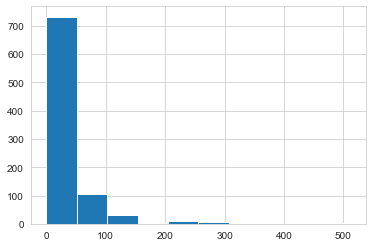

In [19]:
train['Fare'].hist()

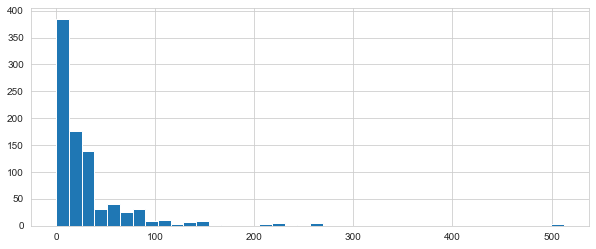

In [20]:
train['Fare'].hist(bins=40,figsize=(10,4))

The above fare plot shows that most of the passenger have bought the ticket between $0 - $50. That menas third class cheaper ticket.

### Cufflinks for Plots
Cufflinks is another library that connects the Pandas data frame with Plotly enabling users to create visualizations directly from Pandas. The library binds the power of Plotly with the flexibility of Pandas for easy plotting

In [21]:
import cufflinks as cf # pip install cufflinks

In [22]:
cf.go_offline()

In [23]:
train['Fare'].iplot(kind='hist',bins=30)

### Logistic Regression Part 2 : DATA CLEANING
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation). However we can be smarter about this and check the average age by passenger class.

खाली ठाउँमा मिन एज भ्यालु राख्ने। OR we can give another value too.

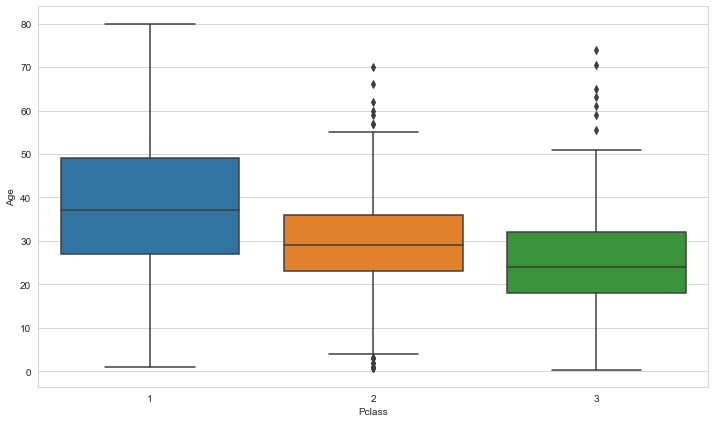

In [24]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train)

The above plot shows that the passengers in the first and the second class are a little bit older than the passengers in the 3rd class.

OR

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [25]:
# mean values of ages for 1st class= 37, 2nd class = 29, 3rd class = 24, see above box plot
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [26]:
# Now apply that function!
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1) # axis=1 means want to apply across the column

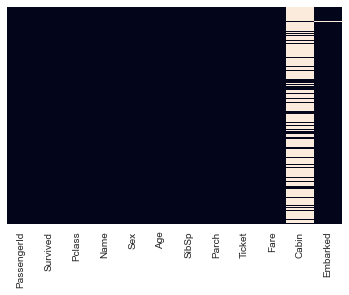

In [27]:
# Now let's check that heat map again!
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

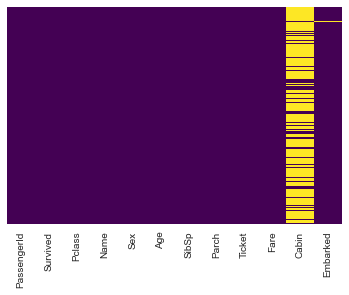

In [28]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

 हेर्दाखेरी यो क्याबिन कोलममा डाटा मिसिङ छ। 
 
 Great! Let's go ahead and drop the Cabin column and the row in Embarked that is NaN.

In [29]:
train.drop('Cabin',axis=1,inplace=True)

In [30]:
train.head() # No Cabin, dropped

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [31]:
train.dropna(inplace=True)

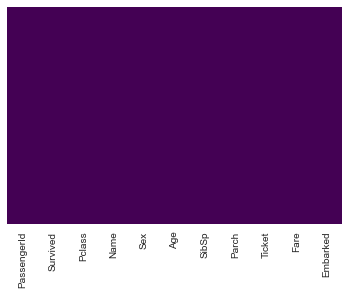

In [32]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Now, nothing is missing. We got the solid color. We are good to go. The first step with cleaning the data. Dealing with the missing value. Great!

### Converting Categorical Features 

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs. For example, Sex column: male and female are categorical features. Machine Learning algorithm is not going to be able to take strings male or female. So simple way is use 0 to indicate male and 1 for female.

In [33]:
# Please use dummy method in this case.
#It changes the categorical variables into dummy variables.
pd.get_dummies(train['Sex'])
# female =1 means male = 0 like bolean

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [34]:
pd.get_dummies(train['Sex'],drop_first=True)
# first is male in Sex column

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [35]:
sex = pd.get_dummies(train['Sex'],drop_first=True) # female dropped vayo

In [36]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [37]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)# Dropped the C column

In [38]:
embark.head() 

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [39]:
train = pd.concat([train,sex,embark],axis=1) # train previous, sex has male column, embark has Q,S column. Add to

In [40]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


You can drop unsued or not important column, simply using 'drop' command like this.

In [41]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [42]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [43]:
train.tail()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
886,887,0,2,27.0,0,0,13.00,1,0,1
887,888,1,1,19.0,0,0,30.00,0,0,1
888,889,0,3,24.0,1,2,23.45,0,0,1
889,890,1,1,26.0,0,0,30.00,1,0,0
890,891,0,3,32.0,0,0,7.75,1,1,0


In [44]:
train.drop('PassengerId', axis=1,inplace=True)
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


When inplace = True , the data is modified in place, which means it will return nothing and the dataframe is now updated. When inplace = False , which is the default, then the operation is performed and it returns a copy of the object. Now Column PassengerID is dropped.

# Building a Logistic Regression model

Let's start by splitting our data into a training set and test set (there is another test.csv file that you can play around with in case you want to use all this data for training).

## Train Test Split

In [45]:
from sklearn.model_selection import train_test_split

### Training and Predicting

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
logmodel = LogisticRegression(max_iter=1000)


In [48]:
logmodel.fit(X_train,y_train)

NameError: name 'X_train' is not defined

In [ ]:
predictions = logmodel.predict(X_test)

In [49]:
predictions

NameError: name 'predictions' is not defined

### Evaluation:
We can check precision,recall,f1-score using classification report!

In [50]:
from sklearn.metrics import classification_report

In [51]:
print(classification_report(y_test,predictions))

NameError: name 'y_test' is not defined

In [52]:
from sklearn.metrics import confusion_matrix

In [53]:
confusion_matrix(y_test,predictions) # (FP, FN....etc)

NameError: name 'y_test' is not defined